# Hotels Reviews Sentiment Analysis

In [182]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# Graphing Lib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params,palette='Set1')
# Configuring styles
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
from wordcloud import WordCloud
## NLP Libraries
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load the Dataset

In [201]:
df = pd.read_csv('./hotel-reviews.csv')

In [202]:
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


## Exploratory Data Analysis

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


### Shape of dataset

In [204]:
df.shape
#rows,col

(38932, 5)

### Columns Data type

In [205]:
df.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

### Null values in dataset

In [206]:
df.isna().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

* No Null Values in dataset

### Columns in dataset

In [207]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

### First 5 rows of dataset

In [208]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


### Making a new data frame of required columns 

In [209]:
df_new = df[['Description', 'Is_Response']].copy()

In [210]:
df_new.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


### What are the different values in Is_Response column ?

In [211]:
df_new['Is_Response'].unique()

array(['not happy', 'happy'], dtype=object)

### Count of Happy and Not Happy reviews in dataset

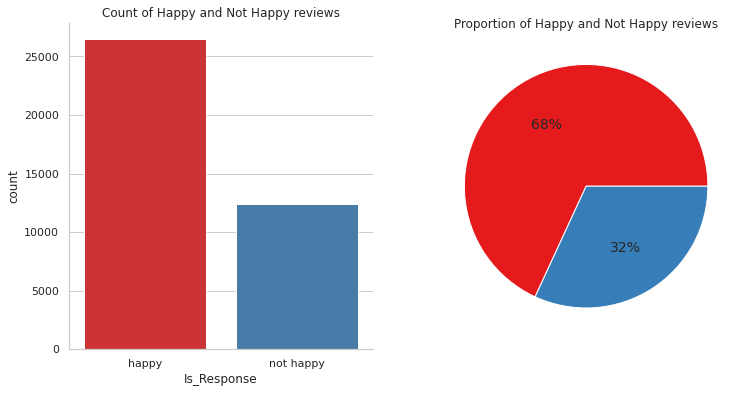

In [212]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_new,x='Is_Response',order=df_new['Is_Response'].value_counts().index)
plt.title('Count of Happy and Not Happy reviews')
plt.subplot(1, 2, 2);
plt.title('Proportion of Happy and Not Happy reviews')
plt.pie(df_new[['Is_Response']].value_counts(),autopct='%.0f%%',colors=sns.color_palette('Set1'));

### Word cloud for Positive Reviews

In [213]:
pos_reviews = df_new[df['Is_Response']=='happy']['Description']

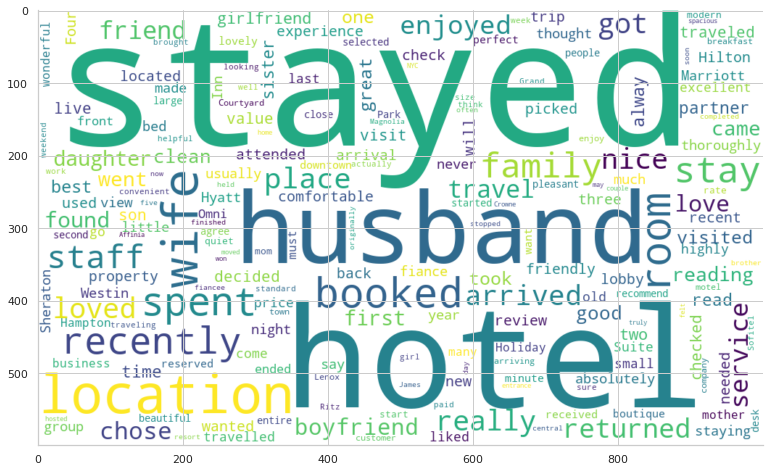

In [214]:
text = " ".join(row.split()[1] for row in pos_reviews)
plt.figure(figsize=(14,8))
word_cloud2 = WordCloud(collocations = False, background_color = 'white', width=1000,height=600,).generate(text)
plt.imshow(word_cloud2, interpolation='bilinear');

#### Most Frequeent words in positive reviews are
* Wifi
* Location
* room
* place etc 

### Word Cloud for Negative Reviews

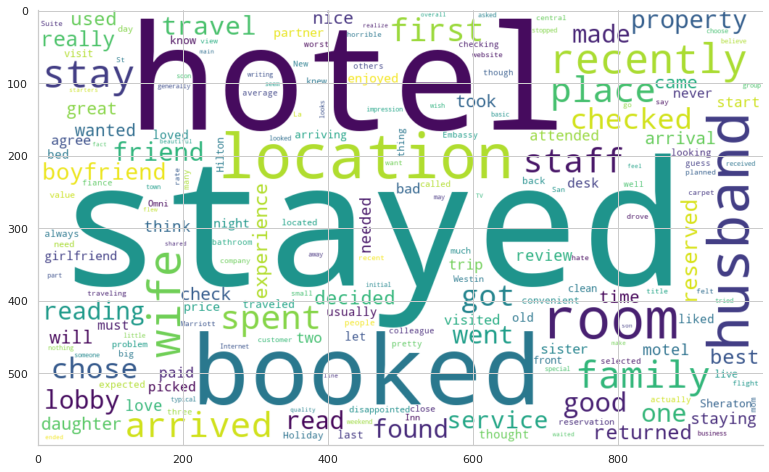

In [215]:
neg_reviews = df_new[df['Is_Response']=='not happy']['Description']
text = " ".join(row.split()[1] for row in neg_reviews)
plt.figure(figsize=(14,8))
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000,height=600,).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

## Data Preprocessing

In [216]:
df_new

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


## Sentiment Analysis with VADER

In [217]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()

In [219]:
df_new['Scores'] = df_new['Description'].apply(lambda Description: sid.polarity_scores(Description))
df_new['Positive']  = df_new['Scores'].apply(lambda score_dict: score_dict['pos'])
df_new['Neutral']  = df_new['Scores'].apply(lambda score_dict: score_dict['neu'])
df_new['Negative']  = df_new['Scores'].apply(lambda score_dict: score_dict['neg'])
df_new['Compound']  = df_new['Scores'].apply(lambda score_dict: score_dict['compound'])
df_new.drop('Scores',axis=1,inplace=True)
df_new.head()

,Description,Is_Response,Positive,Neutral,Negative,Compound
0,The room was kind of clean but had a VERY stro...,not happy,0.325,0.675,0.000,0.9628
1,I stayed at the Crown Plaza April -- - April -...,not happy,0.050,0.897,0.053,-0.1243
2,I booked this hotel through Hotwire at the low...,not happy,0.085,0.866,0.048,0.9279
3,Stayed here with husband and sons on the way t...,happy,0.347,0.653,0.000,0.9920
4,My girlfriends and I stayed here to celebrate ...,not happy,0.088,0.871,0.041,0.9088
